1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

In [20]:
N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2
# print(x1,x2,x3)
X = np.array((x1, x2, x3))
cov = np.cov(X)
l, V = np.linalg.eig(cov)
print('Eigenvalues with Eigen-decomposition:\n',l)
print('Eigenvectors with Eigen-decomposition:\n',V)

U, spectrum, Vt = linalg.svd(cov)
print('Eigenvalues with SVD:\n',spectrum[[0,2,1]])
print('Eigenvectors with SVD:\n',Vt.T[:,[0,2,1]])

Lambda = np.diag(l)
print('Percent of the total datasets variability explained by the principal components:\n',l/Lambda.trace())
print('Percent of the total datasets variability explained by the the reduced system:\n', np.sum(l[[0,2]])/Lambda.trace())


print('The first eigenvalue is the greatest and the second one is very close to 0')

Eigenvalues with Eigen-decomposition:
 [ 2.86047893e+01 -2.28746868e-16  2.05206604e+00]
Eigenvectors with Eigen-decomposition:
 [[-0.10705604 -0.81649658  0.56733794]
 [-0.58778819 -0.40824829 -0.69845428]
 [-0.80190027  0.40824829  0.4362216 ]]
Eigenvalues with SVD:
 [2.86047893e+01 4.97554149e-16 2.05206604e+00]
Eigenvectors with SVD:
 [[-0.10705604 -0.81649658  0.56733794]
 [-0.58778819 -0.40824829 -0.69845428]
 [-0.80190027  0.40824829  0.4362216 ]]
Percent of the total datasets variability explained by the principal components:
 [ 9.33063388e-01 -7.46152420e-18  6.69366124e-02]
Percent of the total datasets variability explained by the the reduced system:
 1.0
The first eigenvalue is the greatest and the second one is very close to 0


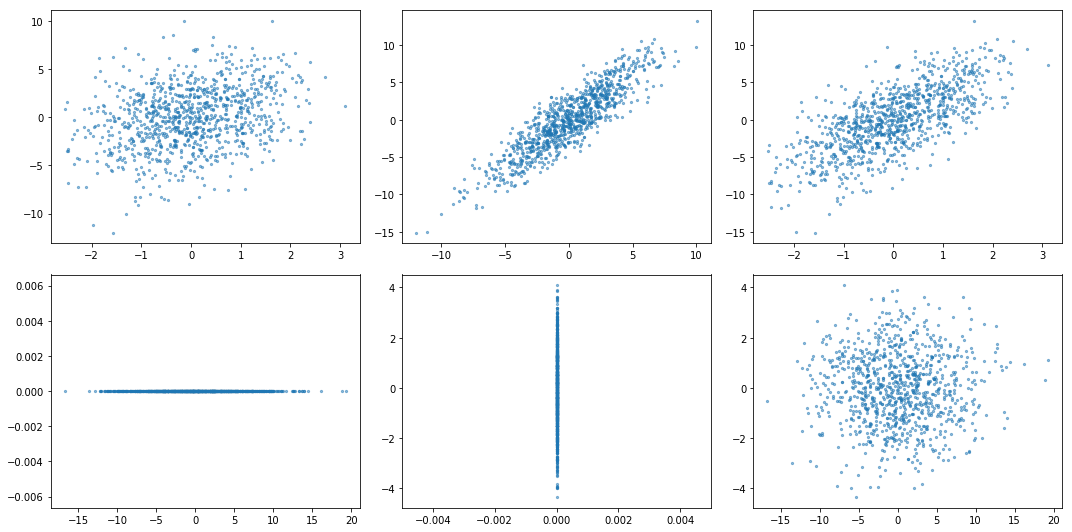

In [17]:
x_new = np.dot(V.T,X)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 7.5))

axs[0,0].scatter(X[0],X[1], s=5, alpha=0.5)
axs[0,1].scatter(X[1],X[2], s=5, alpha=0.5)
axs[0,2].scatter(X[0],X[2], s=5, alpha=0.5)

axs[1,0].scatter(x_new[0],x_new[1], s=5, alpha=0.5)
axs[1,1].scatter(x_new[1],x_new[2], s=5, alpha=0.5)
axs[1,2].scatter(x_new[0],x_new[2], s=5, alpha=0.5)

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

Eigenvalues with Eigen-decomposition:
 [2.85899762e+01 4.05888179e-03 2.05729894e+00]
Eigenvectors with Eigen-decomposition:
 [[-0.10709596 -0.8163742   0.5675065 ]
 [-0.58762079 -0.40845915 -0.69847186]
 [-0.80201762  0.40828213  0.43597413]]
Eigenvalues with SVD:
 [2.85899762e+01 4.05888179e-03 2.05729894e+00]
Eigenvectors with SVD:
 [[-0.10709596 -0.8163742   0.5675065 ]
 [-0.58762079 -0.40845915 -0.69847186]
 [-0.80201762  0.40828213  0.43597413]]
Percent of the total datasets variability explained by the principal components:
 [9.32748186e-01 1.32421049e-04 6.71193934e-02]
Percent of the total datasets variability explained by the the reduced system:
 0.9998675789513589


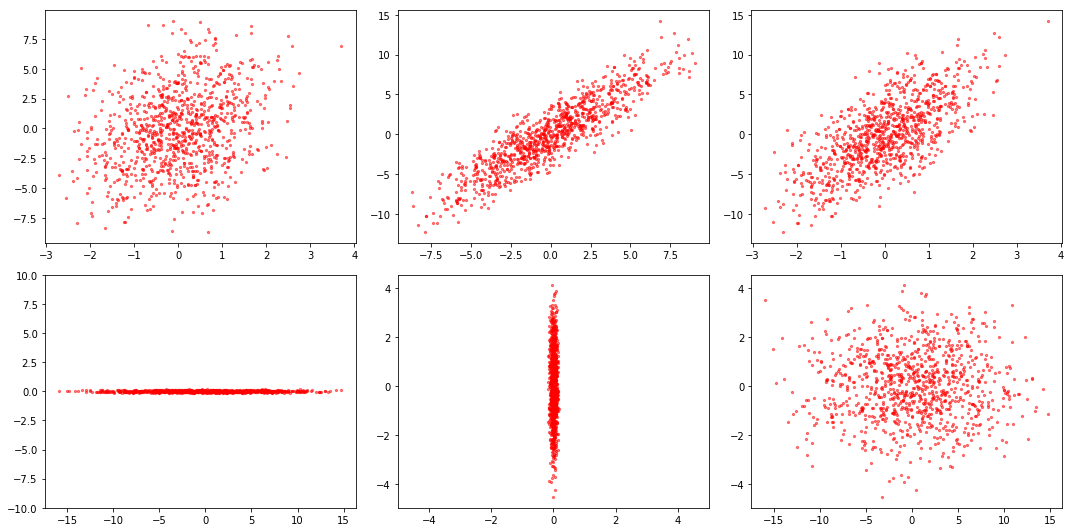

In [26]:
noises = np.random.normal(loc=0, scale=1/50, size=(3, N, 10))
x_noise = X + np.sum(noises, axis = 2)

cov2 = np.cov(x_noise)
l2, V2 = np.linalg.eig(cov2)
print('Eigenvalues with Eigen-decomposition:\n',l2)
print('Eigenvectors with Eigen-decomposition:\n', V2)

U2, spectrum2, Vt2 = linalg.svd(cov2)
print('Eigenvalues with SVD:\n',spectrum2[[0,2,1]])
print('Eigenvectors with SVD:\n', Vt2.T[:,[0,2,1]])

Lambda = np.diag(l2)
print('Percent of the total datasets variability explained by the principal components:\n',l2/Lambda.trace())

print('Percent of the total datasets variability explained by the the reduced system:\n', np.sum(l2[[0,2]])/Lambda.trace())

x_new = np.dot(V2.T,x_noise)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 7.5))

axs[0,0].scatter(x_noise[0],x_noise[1],c='r', s=5, alpha=0.5)
axs[0,1].scatter(x_noise[1],x_noise[2], c='r', s=5, alpha=0.5)
axs[0,2].scatter(x_noise[0],x_noise[2], c='r',s=5, alpha=0.5)

axs[1,0].scatter(x_new[0],x_new[1],c='r', s=5, alpha=0.5)
axs[1,0].set_ylim(-10,10)
axs[1,1].scatter(x_new[1],x_new[2],c='r', s=5, alpha=0.5)
axs[1,1].set_xlim(-5,5)
axs[1,2].scatter(x_new[0],x_new[2], c='r',s=5, alpha=0.5)

plt.tight_layout()
plt.show()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [46]:
n = 10
n_rec = 1000
tetha, gamma = np.random.randint(0,360,n), np.random.randint(0,360,n)
fi = 0
A = 3
w = 2
t = np.linspace(0,20,n_rec)
x = A*np.cos(w*t-fi)
y = np.random.uniform(size=n_rec) 
z = np.zeros(n_rec)

def Rx(angle):
    s = np.sin(angle)
    c = np.cos(angle)
    return [[1, 0,  0],
             [0, c, -s],
             [0, s,  c]]
def Ry(angle):
    s = np.sin(angle)
    c = np.cos(angle)
    return [[c,  0, s],
             [0,  1, 0],
             [-s, 0, c]]
X3 = np.array([x, y, z])
X_rot = []
for ang1, ang2 in zip(np.deg2rad(tetha), np.deg2rad(gamma)):
    R = np.dot(Ry(ang1), Rx(ang2))
    X_rot.append(np.dot(R,X3))
variability = []
for (X3, te, ga) in zip(X_rot, tetha, gamma):
    l, V = np.linalg.eig(np.cov(X3[:2,:]))
    Lambda=np.diag(l) # big lambda
    variability.append(Lambda[0,0]/Lambda.trace())
print('best variability', np.max(variability))

best variability 0.9998520609230218


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [30]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names

--2020-11-29 16:23:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: 'magic04.data'

     0K .......... .......... .......... .......... ..........  3% 82.7K 17s
    50K .......... .......... .......... .......... ..........  6%  166K 12s
   100K .......... .......... .......... .......... .......... 10%  904K 8s
   150K .......... .......... .......... .......... .......... 13%  170K 8s
   200K .......... .......... .......... .......... .......... 17%  697K 6s
   250K .......... .......... .......... .......... .......... 20%  228K 6s
   300K .......... .......... .......... .......... .......... 24% 1021K 5s
   350K .......... .......... .......... .......... .......... 27%  923K 4s
   40

In [32]:
import pandas as pd
data4 = pd.read_csv("magic04.data", names=["fLength","fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "fClass"])
data4

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,fClass
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


Percentages on components:
 [8.41458352e-01 7.40017563e-02 3.67405713e-02 2.35937550e-02
 1.44782138e-02 7.64354621e-03 2.06857071e-03 1.21916189e-05
 2.43785276e-06 5.97891621e-07 7.34074725e-09]


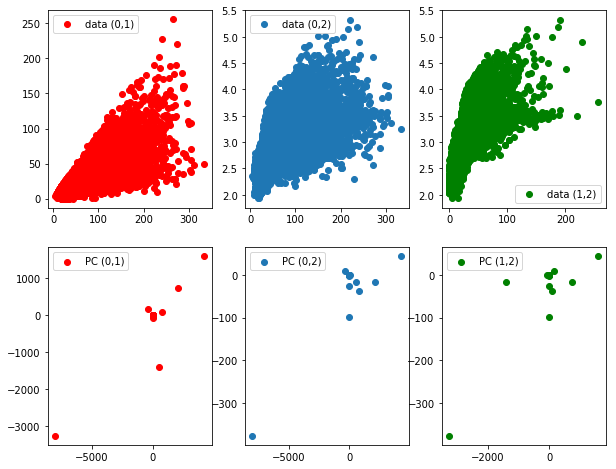

In [35]:
data4.loc[data4['fClass']=='h', 'fClass']=0
data4.loc[data4['fClass']=='g', 'fClass']=1
N4 = len(data4)
U4,spectrum4,Vt4=np.linalg.svd(data4)
l_svd4 = spectrum4**2/(N4-1)

pcaData = np.dot(U4.T, data4)
percs = l_svd4/np.sum(l_svd4)
print("Percentages on components:\n", percs)
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(10,8))
ax1.scatter(data4.values[:,0], data4.values[:,1], label='data (0,1)', color='r')
ax1.legend()
ax2.scatter(data4.values[:,0], data4.values[:,2],label='data (0,2)')
ax2.legend()
ax3.scatter(data4.values[:,1], data4.values[:,2],label='data (1,2)', color='g')
ax3.legend()
ax4.scatter(pcaData[:,0], pcaData[:,1], label='PC (0,1)', color='r')
ax4.legend()
ax5.scatter(pcaData[:,0], pcaData[:,2],label='PC (0,2)')
ax5.legend()
ax6.scatter(pcaData[:,1], pcaData[:,2],label='PC (1,2)', color='g')
ax6.legend()
plt.show()